<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module6_CART_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

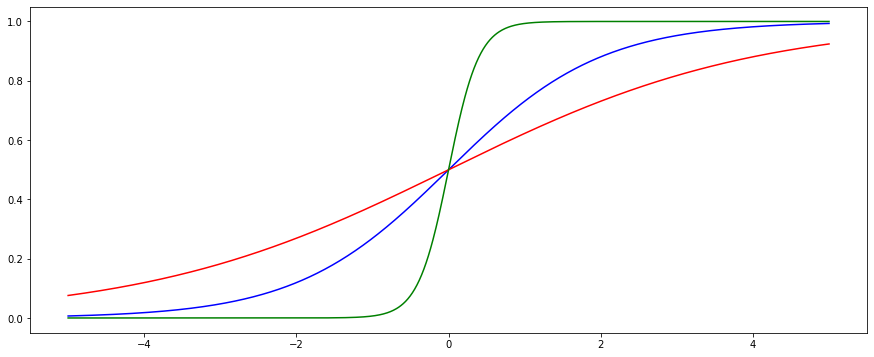

In [29]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,6))
plt.plot(x, sigmoid(x), color='b')
plt.plot(x, sigmoid(0.5*x), color='r')
plt.plot(x, sigmoid(5*x), color='g')

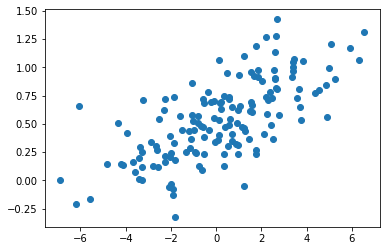

In [39]:
np.random.seed(1)
x = 3 * np.random.normal(0, 1, 150)
eps = 0.25 * np.random.normal(0, 1, 150)

y_1 = sigmoid(0.5 * x) + eps
y_2 = sigmoid(5 * x) + eps

mydata1 = pd.DataFrame({'y_1':y_1,'x':x})
mytraindata1 = mydata1[1:100]
mytestdata1 = mydata1[101:150]

plt.scatter(mydata1.x,mydata1.y_1)

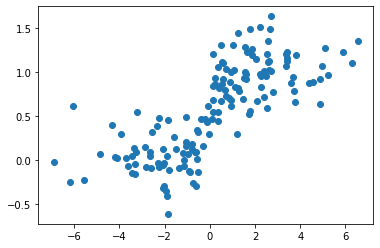

In [40]:
mydata2 = pd.DataFrame({'y_2':y_2,'x':x})
mytraindata2 = mydata2[1:100]
mytestdata2 = mydata2[101:150]
plt.scatter(mydata2.x,mydata2.y_2)

In [41]:
X_1train = mytraindata1['x'].values.reshape(-1,1)
X_1test = mytestdata1['x'].values.reshape(-1,1)
y_1train = mytraindata1['y_1'].values
lmfit1 = LinearRegression(fit_intercept=True)
lmfit1.fit(X_1train,y_1train)
yhat_OOS1 = lmfit1.predict(X_1test)
OLS_OOS_MSE1 = sum((mytestdata1['y_1'] - yhat_OOS1)**2)/50
OLS_OOS_MSE1

0.05140254482806844

In [42]:
X_2train = mytraindata2['x'].values.reshape(-1,1)
X_2test = mytestdata2['x'].values.reshape(-1,1)
y_2train = mytraindata2['y_2'].values
lmfit2 = LinearRegression(fit_intercept=True)
lmfit2.fit(X_2train,y_2train)
yhat_OOS2 = lmfit2.predict(X_2test)
OLS_OOS_MSE2 = sum((mytestdata2['y_2'] - yhat_OOS2)**2)/50
OLS_OOS_MSE2

0.0903331174563528

In [43]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=3)
tree2.fit(X_2train, y_2train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
# This function creates images of tree models using pydot, as the package sklearn doesn't offer graphs of the trees
# If using anaconda, type "pip install pydot" and "conda install graphviz" in the terminal to install. You may need to add pydot to your PATH as well.
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

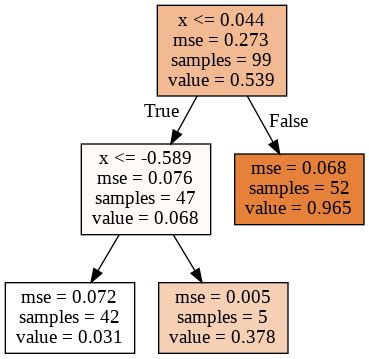

In [45]:
# Tree algorithms are implemented differently in R and Python, so generally we don't expect exactly the same results from R and Python.
graph, = print_tree(tree2, features=['x'])
Image(graph.create_png())

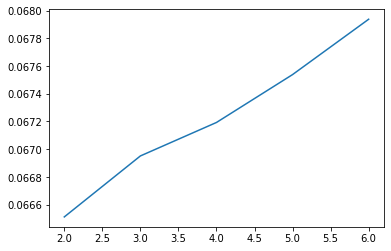

In [46]:
from sklearn.model_selection import cross_val_score
OLS_OOS_MSE2 = []
cv_score = []
for i in range(2,7):
    tree2 = DecisionTreeRegressor(max_leaf_nodes=i)
    tree2.fit(X_2train, y_2train)
    ytreehat2 = tree2.predict(X_2test)
    OLS_OOS_MSE2.append(sum((mytestdata2['y_2'] - ytreehat2)**2)/50)
    cv_score.append(sum(cross_val_score(tree2, X_2train, y_2train, cv=5)))
plt.plot(range(2,7),OLS_OOS_MSE2)

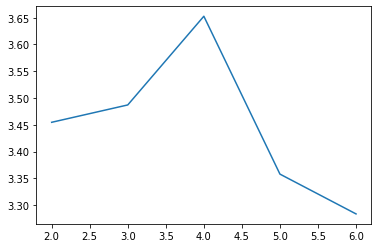

In [47]:
plt.plot(range(2,7),cv_score)

In [ ]:
# Python doesn't have automatic pruning algorithm. We can prune ourselves by cross 
# validation with hyper-parameters in the DecisionTreeRegressor function. 
# More info at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

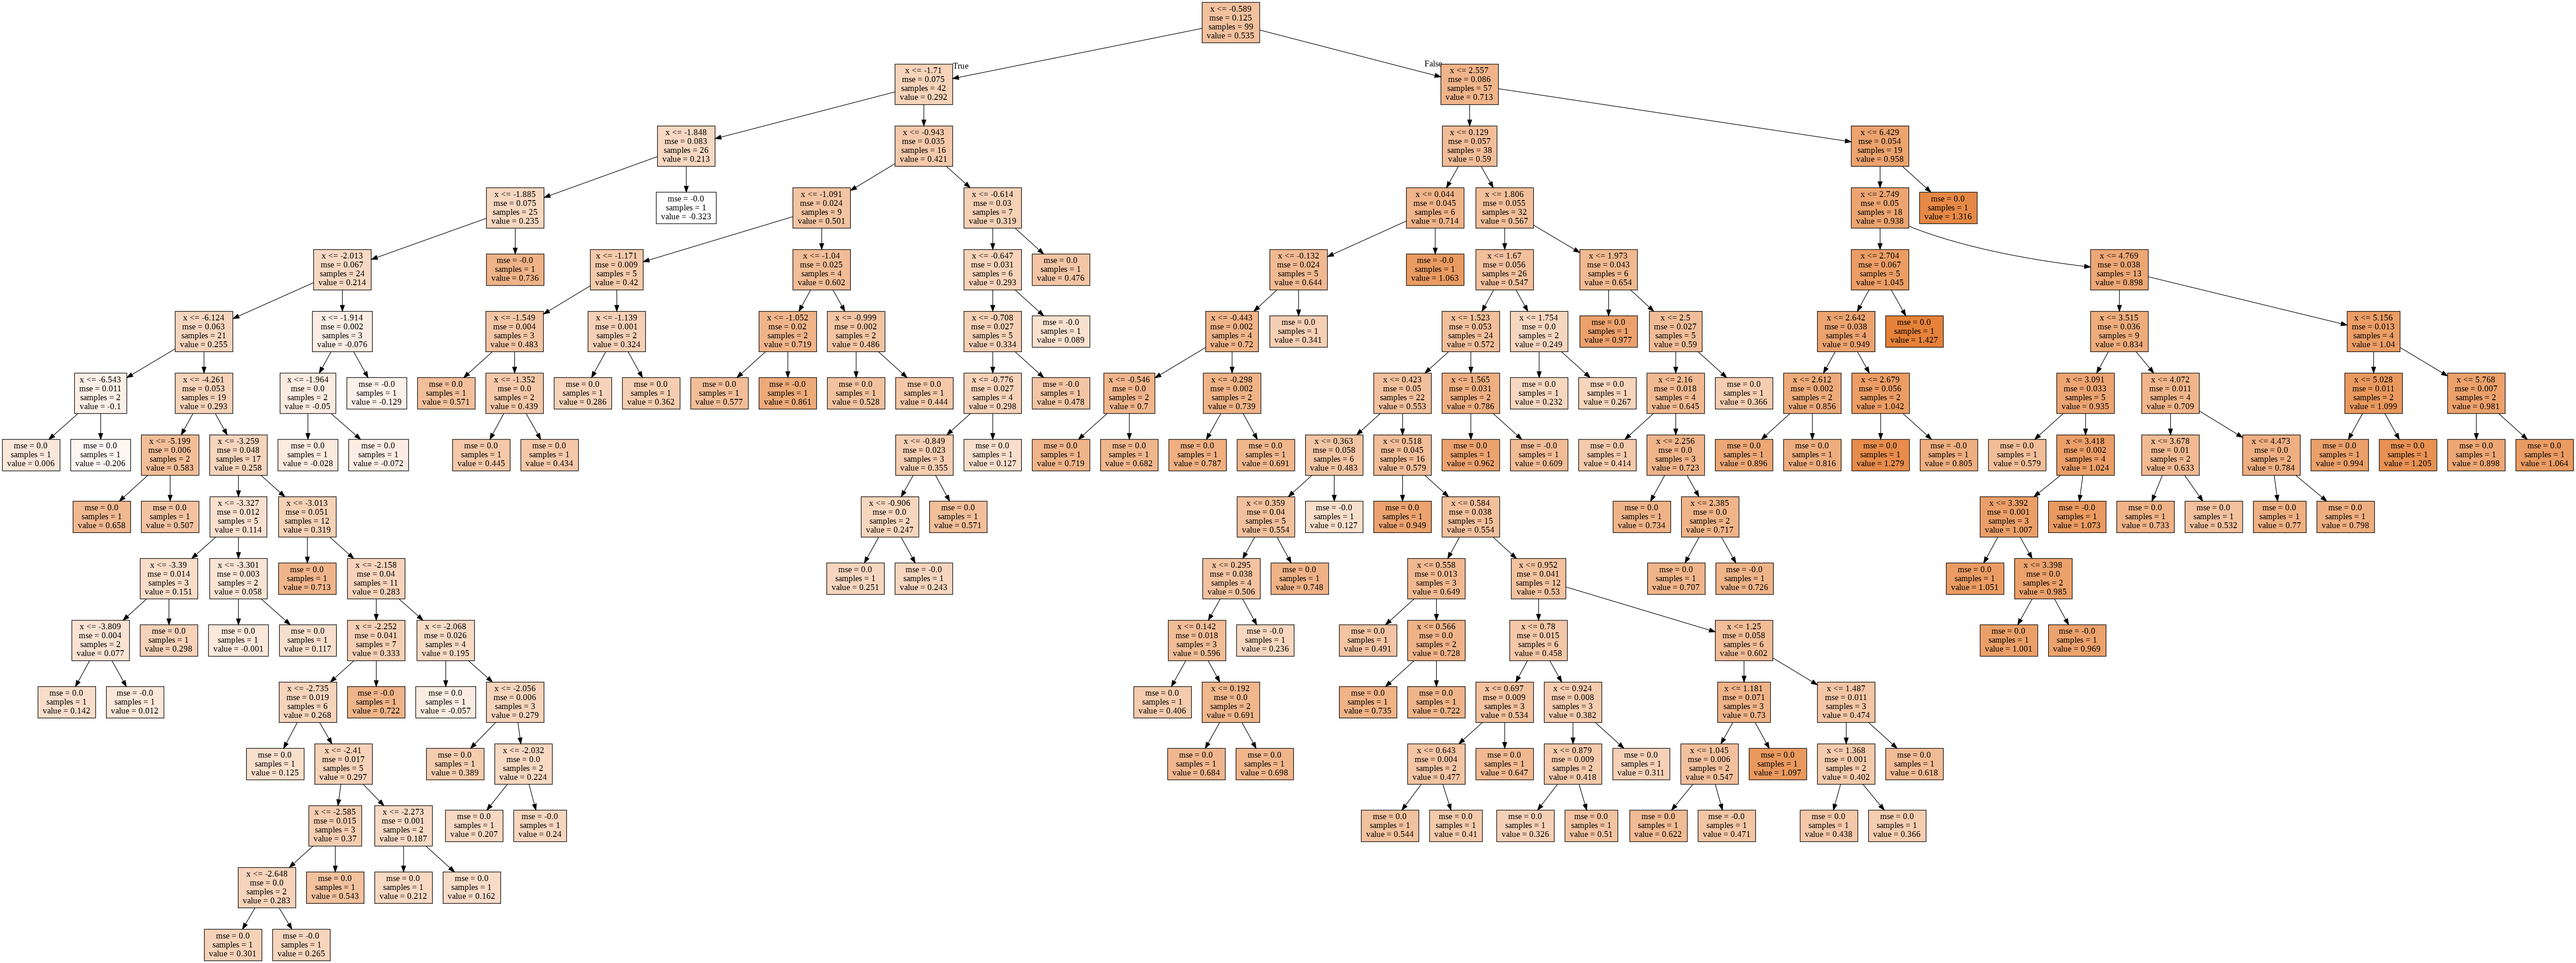

In [48]:
tree1 = DecisionTreeRegressor()
tree1.fit(X_1train, y_1train)
graph, = print_tree(tree1, features=['x'])
Image(graph.create_png())

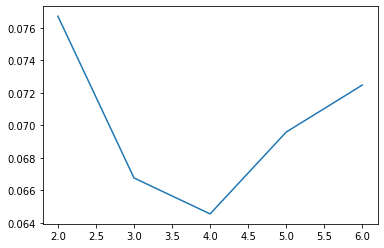

In [49]:
OLS_OOS_MSE1 = []
cv_score = []
for i in range(2,7):
    tree1 = DecisionTreeRegressor(max_leaf_nodes=i)
    tree1.fit(X_1train, y_1train)
    ytreehat1 = tree1.predict(X_1test)
    OLS_OOS_MSE1.append(sum((mytestdata1['y_1'] - ytreehat1)**2)/50)
    cv_score.append(sum(cross_val_score(tree1, X_1train, y_1train, cv=5)))
plt.plot(range(2,7),OLS_OOS_MSE1)

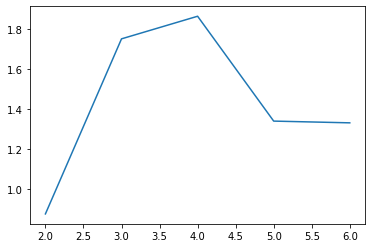

In [50]:
plt.plot(range(2,7),cv_score)

In [ ]:
# Caravan Example

In [52]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 79 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [53]:
Caravan = pd.read_csv('ML_656/Caravan.csv', index_col=0)

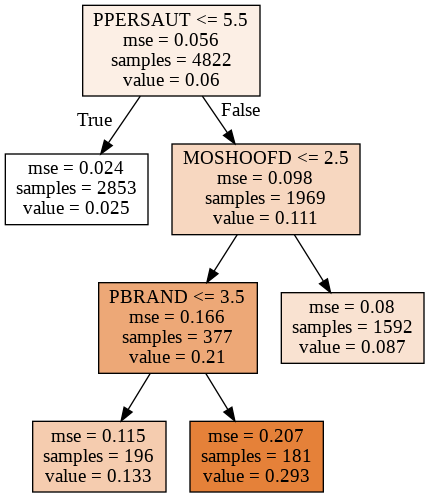

In [54]:
Caravan.Purchase = Caravan.Purchase=='Yes'
test = Caravan.iloc[0:1000]
train = Caravan.iloc[1000:len(Caravan)]
X = train.drop(columns = ['Purchase'])
y = train.Purchase
Car_tree_first = DecisionTreeRegressor(max_leaf_nodes=4)
Car_tree_first.fit(X, y)
graph, = print_tree(Car_tree_first, features=X.columns)
Image(graph.create_png())

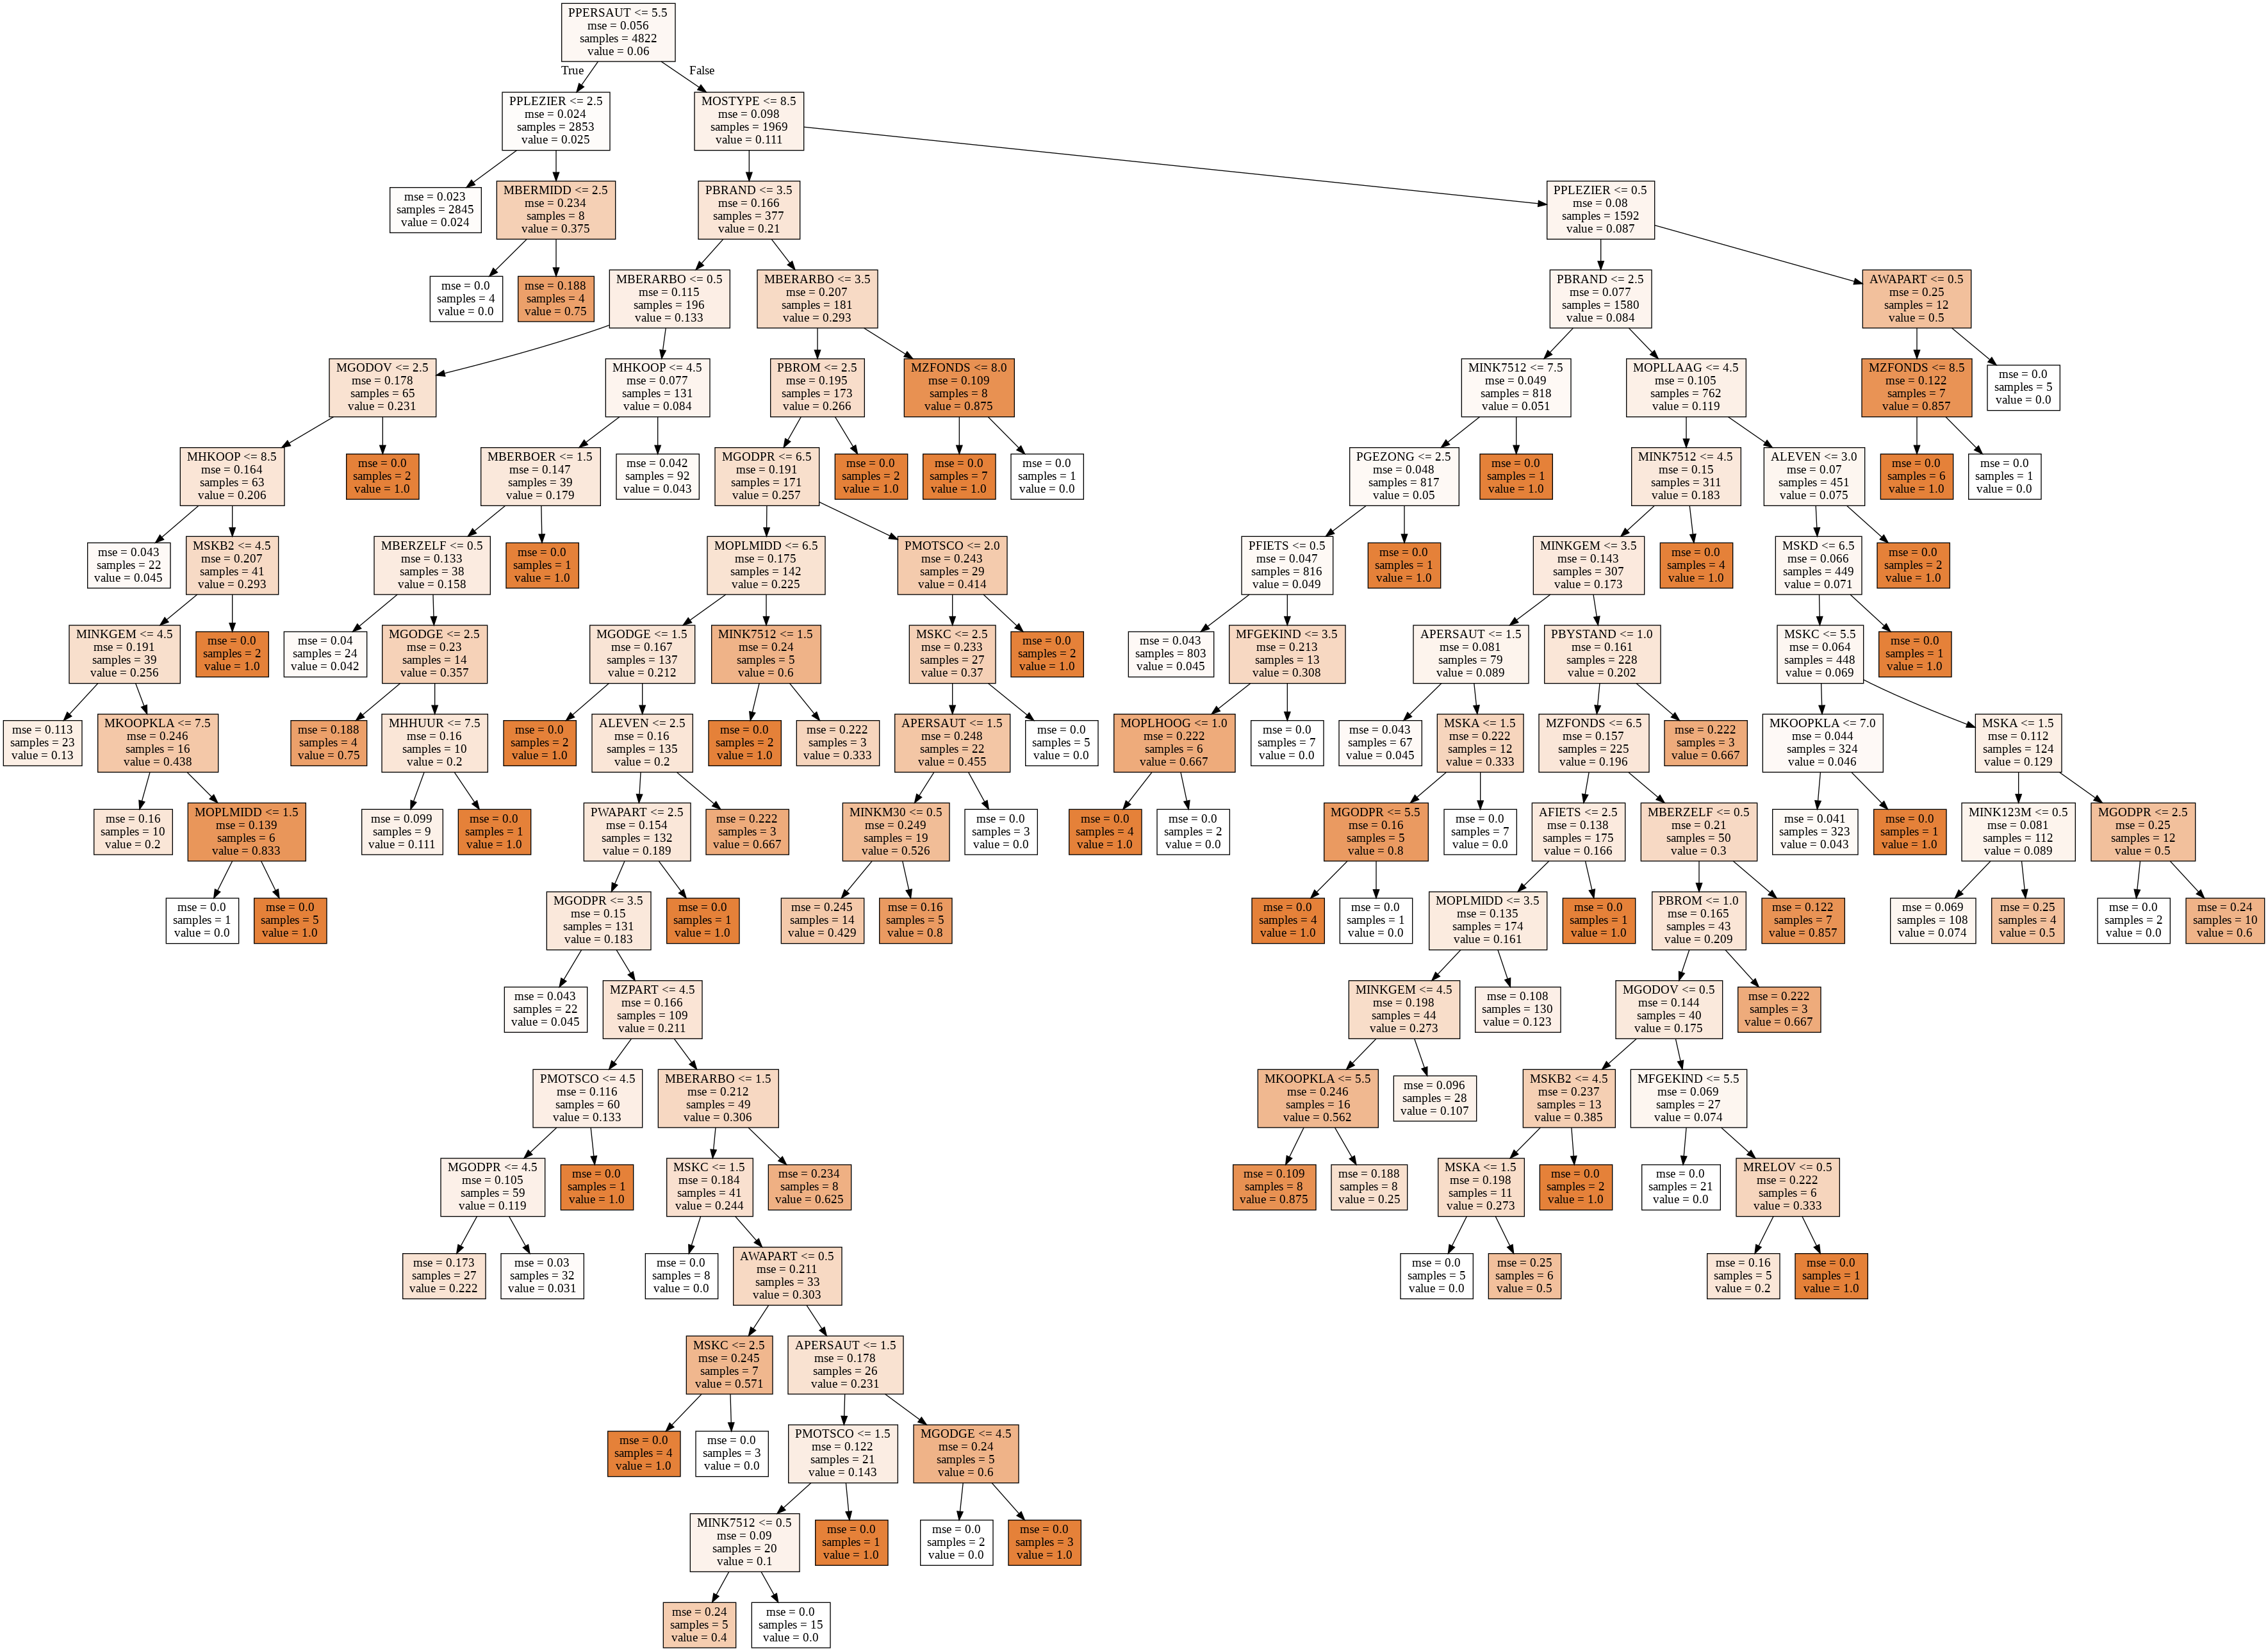

In [55]:
Car_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.0001)
Car_tree.fit(X, y)
graph, = print_tree(Car_tree, features=X.columns)
Image(graph.create_png())

In [56]:
# Top 10 important features
summary_tree = pd.DataFrame({'Features':X.columns,'Importance':Car_tree.feature_importances_}) 
summary_tree.sort_values(by=['Importance'], ascending=False)[0:10]

,Features,Importance
46,PPERSAUT,0.092566
23,MBERARBO,0.051182
39,MINK7512,0.051096
0,MOSTYPE,0.049125
24,MSKA,0.047208
58,PBRAND,0.045757
42,MKOOPKLA,0.042917
27,MSKC,0.040568
41,MINKGEM,0.040469
19,MBERZELF,0.036743


In [57]:
# Number of tree nodes
Car_tree.tree_.node_count

155

In [58]:
yhat = Car_tree.predict(test.drop(columns = ['Purchase']))
pred = yhat > 0.5
np.sum(pred)

31

In [59]:
table = pd.DataFrame({'Purchase':test.Purchase,'pred':pred})
table.groupby(['Purchase','pred']).size().unstack('Purchase')

Purchase,False,True
pred,,
False,921,48
True,20,11
